In [23]:
import pandas as pd
import seaborn as sns
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

import os
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# importing packages which are required for performing this activity/assignment

import pickle
%matplotlib inline
os.chdir(r'C:\Users\Shyam Adsul\SSPU 20-21\Data sets')



In [24]:
df = pd.read_csv('diabetes.csv')
#This is command to read csv file from local directory
 

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [22]:
df.head()
#this command show structure of data of first 5 rows

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [17]:
df.shape
#Is gives us shape of data  mean how many rows and columns are there

(768, 9)

In [20]:
df.isnull().any()
#This method can be used to check is there any presence of null value

Pregnancies                 False
Glucose                     False
BloodPressure               False
SkinThickness               False
Insulin                     False
BMI                         False
DiabetesPedigreeFunction    False
Age                         False
Outcome                     False
dtype: bool

C:\Users\Shyam Adsul\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Shyam Adsul\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Shyam Adsul\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `hist

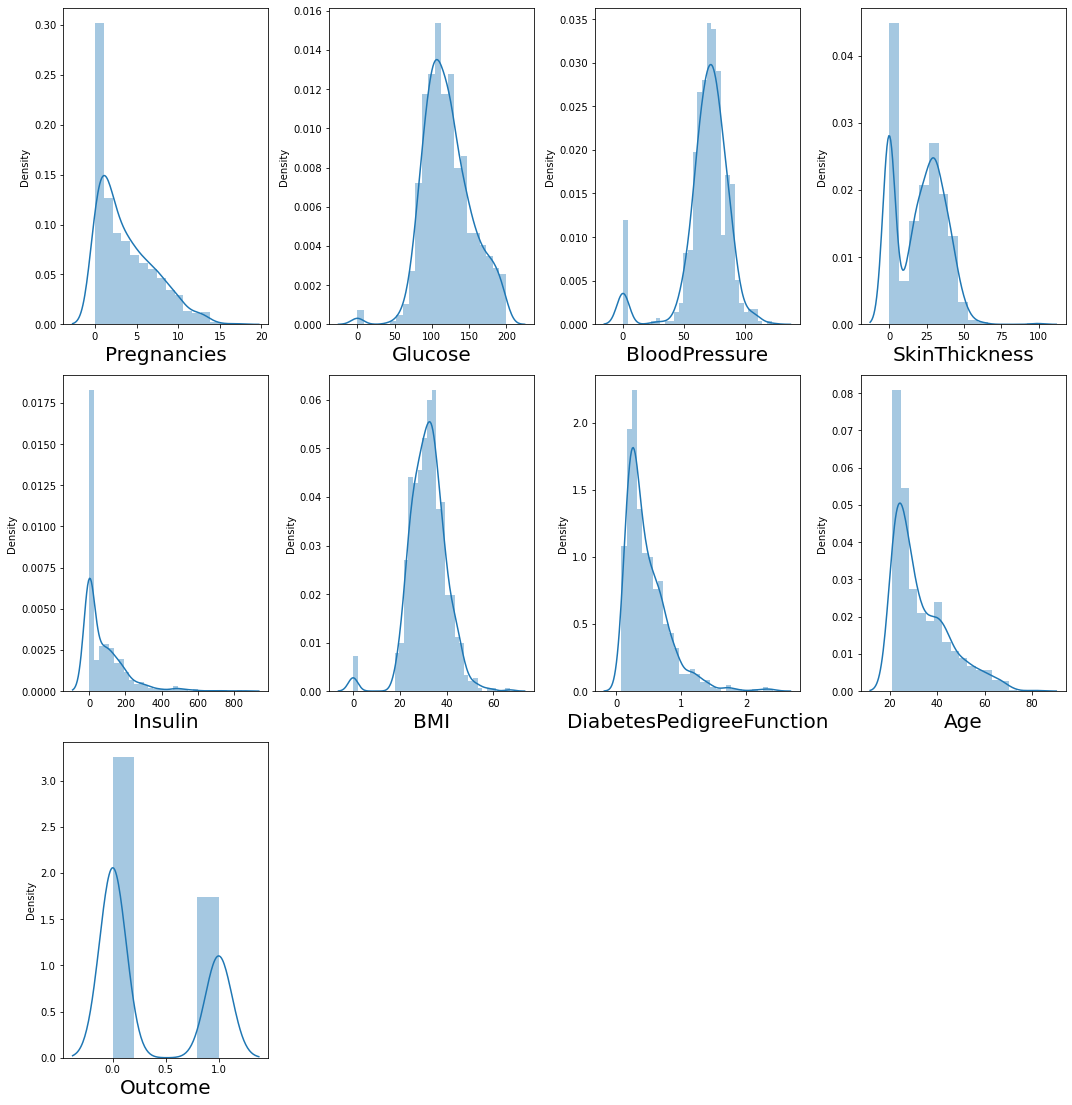

In [19]:
plt.figure(figsize=(15,20), facecolor='white')
plotnumber = 1

for column in df:
    if plotnumber<=16 :
        ax = plt.subplot(4,4,plotnumber)
        sns.distplot(df[column])
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.tight_layout()

-17.05000000000001 		 159.05
-17.05000000000001
159.05


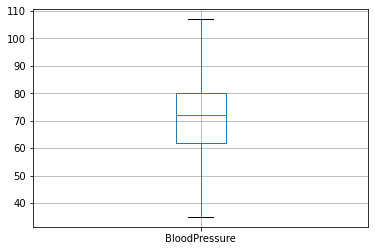

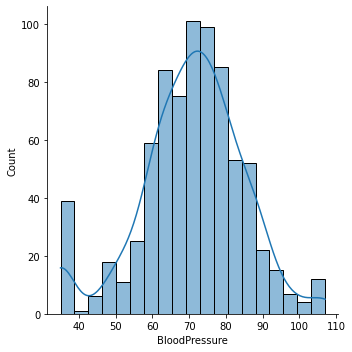

In [10]:
IQR=df.BloodPressure.quantile(0.75)-df.BMI.quantile(0.25)
lower_limit=df['BloodPressure'].quantile(0.25)-(IQR*1.5)
upper_limit=df['BloodPressure'].quantile(0.75)+(IQR*1.5)
print(lower_limit ,"\t\t",upper_limit)
#extreme outliers
lower_bridge=df['BloodPressure'].quantile(0.25)-(IQR*3)
upper_bridge=df['BloodPressure'].quantile(0.75)+(IQR*3)
print(lower_limit), print(upper_limit)

data1 = df.copy()

data1.loc[data1['BloodPressure']>=107,'BloodPressure']=107

data1.loc[data1['BloodPressure']<=35,'BloodPressure']=35


figure=data1.boxplot(column="BloodPressure")
sns.displot(data=data1,x = 'BloodPressure',kde = True)

#Here We used Inter quantile range method for removing the outliers from column
#BloodPressure

65.39999999999999 		 -1.499999999999993
65.39999999999999
-1.499999999999993


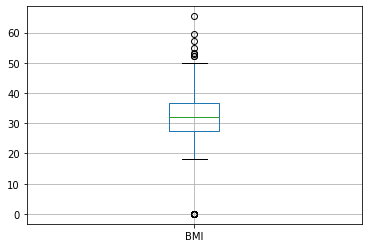

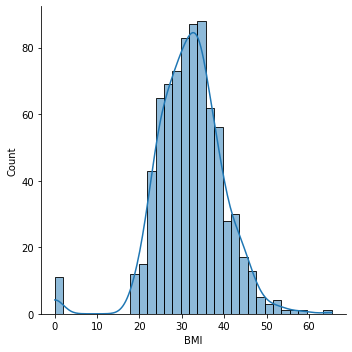

In [11]:
IQR=data1.BMI.quantile(0.75)-data1.BloodPressure.quantile(0.25)
lower_limit=data1['BMI'].quantile(0.25)-(IQR*1.5)
upper_limit=data1['BMI'].quantile(0.75)+(IQR*1.5)
print(lower_limit ,"\t\t",upper_limit)
#extreme outliers
lower_bridge=data1['BMI'].quantile(0.25)-(IQR*3)
upper_bridge=data1['BMI'].quantile(0.75)+(IQR*3)
print(lower_limit), print(upper_limit)

data2 = data1.copy()

data2.loc[data2['BMI']>=65.39999999999999 ,'BMI']=65.39999999999999 

data2.loc[data2['BMI']<=-1.499999999999993,'BMI']=-1.499999999999993


figure=data2.boxplot(column="BMI")
sns.displot(data=data2,x = 'BMI',kde = True)

#Here We used Inter quantile range method for removing the outliers from column
#BMI

In [12]:
data3 = data2.drop('Outcome',axis=1)
data3
concate = data2['Outcome']
concate = pd.DataFrame(concate, columns=['Outcome'])
concate

#why this stratergies we used 
# after scaling the outcome colummn change in float value so have to keep it separate
#and if we scale this column using standard scalar then for logistic regression is gives error while fitting the data in model

,Outcome
0,1
1,0
2,1
3,0
4,1
...,...
763,0
764,0
765,0
766,1


In [13]:
from sklearn.preprocessing import StandardScaler 
import statsmodels.api as sm 
scaler =StandardScaler()

X_scaled = scaler.fit_transform(data3)



X_scaled = pd.DataFrame(X_scaled, columns=['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiaPedigreeFunction','Age'])
X_scaled

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiaPedigreeFunction,Age
0,0.639947,0.848324,0.092691,0.907270,-0.692891,0.204544,0.468492,1.425995
1,-0.844885,-1.123396,-0.330201,0.530902,-0.692891,-0.684978,-0.365061,-0.190672
2,1.233880,1.943724,-0.471166,-1.288212,-0.692891,-1.104324,0.604397,-0.105584
3,-0.844885,-0.998208,-0.330201,0.154533,0.123302,-0.494366,-0.920763,-1.041549
4,-1.141852,0.504055,-2.162737,0.907270,0.765836,1.411752,5.484909,-0.020496
...,...,...,...,...,...,...,...,...
763,1.827813,-0.622642,0.374620,1.722735,0.870031,0.115592,-0.908682,2.532136
764,-0.547919,0.034598,-0.048273,0.405445,-0.692891,0.611182,-0.398282,-0.531023
765,0.342981,0.003301,0.092691,0.154533,0.279594,-0.735808,-0.685193,-0.275760
766,-0.844885,0.159787,-0.753094,-1.288212,-0.692891,-0.240217,-0.371101,1.170732


In [14]:
result = pd.concat([X_scaled, concate], axis=1)
result

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiaPedigreeFunction,Age,Outcome
0,0.639947,0.848324,0.092691,0.907270,-0.692891,0.204544,0.468492,1.425995,1
1,-0.844885,-1.123396,-0.330201,0.530902,-0.692891,-0.684978,-0.365061,-0.190672,0
2,1.233880,1.943724,-0.471166,-1.288212,-0.692891,-1.104324,0.604397,-0.105584,1
3,-0.844885,-0.998208,-0.330201,0.154533,0.123302,-0.494366,-0.920763,-1.041549,0
4,-1.141852,0.504055,-2.162737,0.907270,0.765836,1.411752,5.484909,-0.020496,1
...,...,...,...,...,...,...,...,...,...
763,1.827813,-0.622642,0.374620,1.722735,0.870031,0.115592,-0.908682,2.532136,0
764,-0.547919,0.034598,-0.048273,0.405445,-0.692891,0.611182,-0.398282,-0.531023,0
765,0.342981,0.003301,0.092691,0.154533,0.279594,-0.735808,-0.685193,-0.275760,0
766,-0.844885,0.159787,-0.753094,-1.288212,-0.692891,-0.240217,-0.371101,1.170732,1


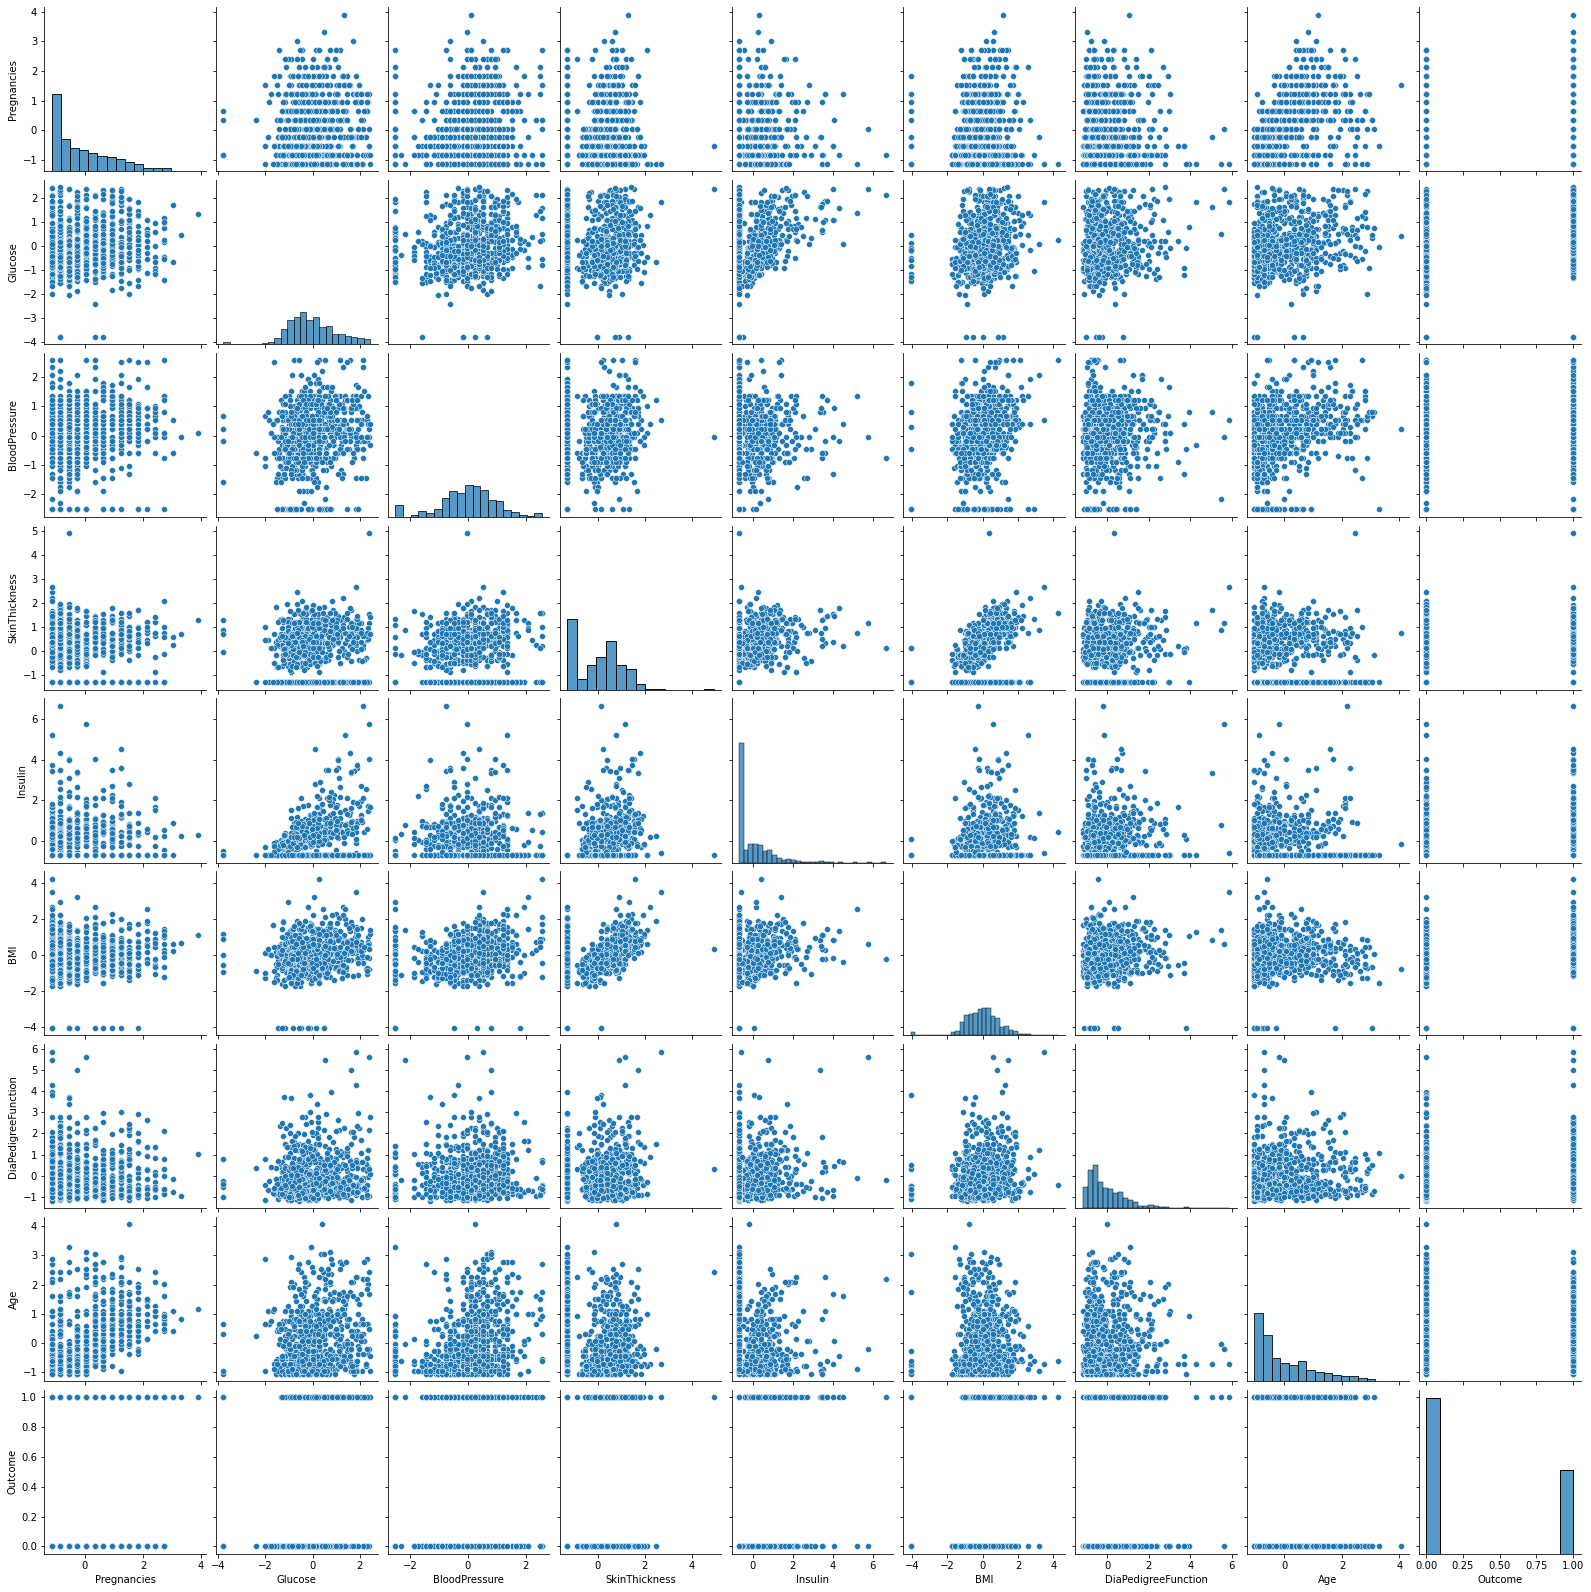

In [15]:
sns.pairplot(result)

In [16]:
y = result['Outcome']
x =result.drop(columns = ['Outcome'])

In [17]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.25,random_state=200)

x_train.shape,x_test.shape,y_train.shape,y_test.shape

((576, 8), (192, 8), (576,), (192,))

In [18]:
model = LogisticRegression()

In [19]:
model.fit(x_train, y_train)


LogisticRegression()

In [20]:
# Step 4: Evaluate the model
score_ = model.score(x, y)
conf_m = confusion_matrix(y, y_pred)
report = classification_report(y, y_pred)

NameError: name 'y_pred' is not defined

In [ ]:
score_

In [ ]:
conf_m

In [ ]:

report.capitalize()

In [ ]:
true_positive = conf_m[0][0]
false_positive = conf_m[0][1]
false_negative = conf_m[1][0]
true_negative = conf_m[1][1]

Accuracy = (true_positive + true_negative) / (true_positive +false_positive + false_negative + true_negative)
Accuracy

In [ ]:
# Precison
Precision = true_positive/(true_positive+false_positive)
Precision

In [ ]:
# Recall
Recall = true_positive/(true_positive+false_negative)
Recall

In [ ]:
# F1 Score
F1_Score = 2*(Recall * Precision) / (Recall + Precision)
F1_Score

In [ ]:
print('Accuracy: {:.2f}'.format(model.score(x_test, y_test)))